# Workflow

Setup magic autoreload

In [1]:
%load_ext autoreload
%autoreload 2

Setup logging

In [1]:
import logging
from pathlib import Path
from IPython.display import Image, display, Markdown
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

## First glance

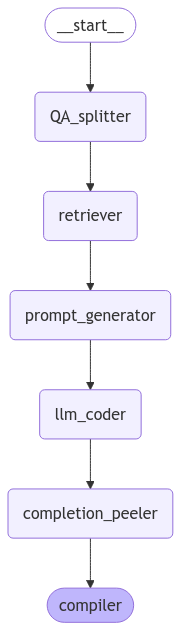

In [2]:
from dsl_gen.core.flows import build_rag_flow

flow = build_rag_flow()
display(
    Image(
        flow.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

## How to use

In [22]:
from dsl_gen import CFG

CFG.MODEL_CFG.active_model = "openai"
challenge_path = Path(CFG.PATH_CFG.CHALLENGES_PATH) / "c008.json" 

flow = build_rag_flow()

result = flow.invoke({"challenge_path": str(challenge_path)}) 

display(Markdown(f"```envision\n{result['completion']}```"))

2025-02-05 14:22:42,499 - dsl_gen - INFO - Retrieved 20 docs for query: Create a table Catal
2025-02-05 14:22:44,340 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


### Question

Create a table Catalog containing different items Name and their color. "red" should be a color cited. Create another table containing the same dimension but only with the red items. Show the Name of the red items.

### Coder's Completion

```envision
table Catalog = with
  [| as Name, as Color |]
  [| "Item A", "blue"   |]
  [| "Item B", "red"    |]
  [| "Item C", "green"  |]
  [| "Item D", "red"    |]

table RedItems = where Color == "red"
RedItems.Name = Catalog.Name

show table "Red Items" with RedItems.Name
```

2025-02-05 14:22:45,033 - dsl_gen - WARNING - Compilation failed (Attempt 1):
table Catalog = with
  [| as Name, as Color |]
  [| "Item A", "blue"   |]
  [| "Item B", "red"    |]
  [| "Item C", "green"  |]
  [| "Item D", "red"    |]

table RedItems = where Color == "red"
RedItems.Name = Catalog.Name

show table "Red Items" with RedItems.Name
2025-02-05 14:22:46,408 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


### Question

Create a table Catalog containing different items Name and their color. "red" should be a color cited. Create another table containing the same dimension but only with the red items. Show the Name of the red items.

### Coder's Completion

```envision
table Products = with
  [| as Name, as Color |]
  [| "Hat", "red"    |]
  [| "Shirt", "blue" |]
  [| "Jeans", "red" |]
  [| "Shoes", "green" |]

table RedProducts = where Color == "red"
RedProducts.Name = Products.Name

show table "Red Items" with RedProducts.Name
```

2025-02-05 14:22:46,820 - dsl_gen - WARNING - Compilation failed (Attempt 2):
table Products = with
  [| as Name, as Color |]
  [| "Hat", "red"    |]
  [| "Shirt", "blue" |]
  [| "Jeans", "red" |]
  [| "Shoes", "green" |]

table RedProducts = where Color == "red"
RedProducts.Name = Products.Name

show table "Red Items" with RedProducts.Name
2025-02-05 14:22:48,194 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


### Question

Create a table Catalog containing different items Name and their color. "red" should be a color cited. Create another table containing the same dimension but only with the red items. Show the Name of the red items.

### Coder's Completion

```envision
table Catalog = with
  [| as Name, as Color |]
  [| "Pen",  "blue"    |]
  [| "Book", "red"     |]
  [| "Desk", "green"   |]

table RedItems = where Color == "red"

show table "Red Items" with RedItems.Name
```

2025-02-05 14:22:48,597 - dsl_gen - WARNING - Compilation failed (Attempt 3):
table Catalog = with
  [| as Name, as Color |]
  [| "Pen",  "blue"    |]
  [| "Book", "red"     |]
  [| "Desk", "green"   |]

table RedItems = where Color == "red"

show table "Red Items" with RedItems.Name


```envision
table Catalog = with
  [| as Name, as Color |]
  [| "Pen",  "blue"    |]
  [| "Book", "red"     |]
  [| "Desk", "green"   |]

table RedItems = where Color == "red"

show table "Red Items" with RedItems.Name```

# Components

## Build vectorstore

Uncomment the following line to build vectorstore manually.

In [3]:
# from dsl_gen.core.vector_store import _build_vectorstore
# store = _build_vectorstore()

# Visualize vectordb

## Visualize a question

In [4]:
from IPython.display import Markdown
query = 'Define a text literal called greetings with value "Hello" and display greetings on the dashboard as a label.'
display(Markdown(query))
answer = '```envision\ngreetings = "Hello" // define the text literal\nshow label greetings // show the text literal as a label. There should be no \'with\' !\n```'
display(Markdown(answer))

Define a text literal called greetings with value "Hello" and display greetings on the dashboard as a label.

```envision
greetings = "Hello" // define the text literal
show label greetings // show the text literal as a label. There should be no 'with' !
```

## Build vectorstore

In [5]:
from dsl_gen.core.vector_store import get_vectorstore
from dsl_gen.config import CFG

# It is normal that you see INFO - Failed to load GPU Faiss
# Since we are using CPU Faiss
vectorstore = get_vectorstore()

2025-02-05 13:34:21,788 - dsl_gen - INFO - Loading embedding model into memory: hf/sentence-transformers/all-mpnet-base-v2
2025-02-05 13:34:32,107 - sentence_transformers.SentenceTransformer - INFO - Load pretrained SentenceTransformer: sentence-transformers/all-mpnet-base-v2
2025-02-05 13:34:46,652 - dsl_gen - INFO - Loading cached vectorstore from D:/Projects/PSC/LLM-DSL-Gen/vector_db\vectorstore_hf_sentence-transformers_all-mpnet-base-v2
2025-02-05 13:34:46,660 - faiss.loader - INFO - Loading faiss with AVX2 support.
2025-02-05 13:34:46,754 - faiss.loader - INFO - Successfully loaded faiss with AVX2 support.
2025-02-05 13:34:46,767 - faiss - INFO - Failed to load GPU Faiss: name 'GpuIndexIVFFlat' is not defined. Will not load constructor refs for GPU indexes.


<span style="color:green;"><b>It is normal that you see the message</b></span> `Failed to load GPU Faiss` <span style="color:green;"><b>since we are using</b></span> `Faiss-CPU`.

Let's see how to retrieve docs by their indices

In [7]:
from IPython.display import Markdown
doc_ids = list(vectorstore.index_to_docstore_id.values())[:5]
for doc_id in doc_ids:
    document = vectorstore.docstore.search(doc_id)
    display(Markdown(document.page_content))

+++
title = "Big Picture"
description = ""
weight = 2
+++  
Lokad is a programmatic, SaaS platform designed for Supply Chain Scientists to execute Quantitative Supply Chain initiatives. The present documentation has been created for a modestly technical audience - typically people who feel at ease writing spreadsheet formulas. Lokad is intended to be accessible to people who are not professional software engineers, but supply chain experts. Below, we provide a technical overview of Lokad, and an initial introduction to Envision, its Domain Specific programming Language (DSL).  
**Table of contents**
{{< toc >}}{{< /toc >}}

## Motivated by Supply Chain  
The [Quantitative Supply Chain](https://www.lokad.com/resources) represents a specific way of tackling Supply Chain Management (SCM) challenges, which Lokad has pioneered and refined over the years. Lokad adopts a broad perspective on SCM, as pricing and assortment decisions also fall under our SCM umbrella. Indeed, SCM is not only about “keeping up” with demand, but also shaping it whenever it is opportune or profitable.  
Lokad is a _programmatic_ SaaS platform that has been engineered to craft, deliver and maintain _bespoke predictive optimization apps_ intended to execute Quantitative Supply Chain initiatives. In this respect, Lokad is quite unlike most enterprise apps. Lokad does not deliver an out of the box _solution_. Lokad provides the _capabilities_ to build a bespoke app that delivers the solution. This app can automatically process all relevant data and deliver both optimized results and the supporting dashboards. The app is written in a programming language named _Envision_, that has been engineered by Lokad. Unlike general purpose programming languages, Envision is accessible to non specialists, i.e. people who are not professional software engineers.  
We refer to people who are capable of executing Quantitative Supply Chain initiatives as [Supply Chain Scientists](https://www.lokad.com/the-supply-chain-scientist). The goal of the present documentation is to provide the technical know-how related to Envision in order to execute such initiatives. Envision is heavily geared towards the resolution of common supply chain problems, however, the actual resolution of supply chain problems requires a fair amount of supply chain expertise before any kind of programming is performed. Actually, we believe that with proper tools, like Envision, supply chain expertise is by far the biggest challenge - not programming with Envision.  
Lokad comes in two flavors: either pure software or software+experts. With our clients, we nearly always start with the software+experts flavor, where Lokad provides a team of Supply Chain Scientists _as a service_ on top of providing its SaaS (Software as a Service) platform. Over Lokad’s history, we realized early on that one of the most powerful ways of de-risking supply chain initiatives was to rely on experienced teams who had “already done it”. Fail fast and break things is typically not advised for supply chain undertakings.  
Nevertheless, Lokad’s technical documentation is public and anyone can train to become a Supply Chain Scientist and Envision wizard. This documentation is used internally at Lokad to train our new Supply Chain Scientists to use our platform. It can also be used by client companies to train their own teams, and ultimately take over the management of their own predictive optimization apps. Beyond that, we also believe that this documentation is of interest to supply chain enthusiasts who have realized, like us, that most popular supply chain recipes, such as ABC analysis or safety stocks, are simply not _good enough_.

## The genesis of Envision  
Envision was not part of our technology roadmap when Lokad was founded in 2008. It took us several years, from 2008 and 2013, and numerous unsuccessful attempts at alternative solutions to even start considering an undertaking as major as the creation of a Domain Specific programming Language (DSL). More specifically, the crux of the problem was our capacity to turn our promising prototypes intended for predictive supply chain optimization into production-grade solutions.  
We were not alone in facing this problem. Back in 2012, while “data science” was not yet the buzzword it would become in the years that followed, we witnessed our most tech-driven clients - typically North American ecommerces - try hard and fail hard at bringing Python prototypes to production. Even when those solutions made it to production, maintenance was a nightmare. Since that time, newer and better machine learning algorithms have been uncovered but, for most supply chain situations, even back in 2012, machine learning was no longer the bottleneck. As Eliyahu M. Goldratt pointed out in his 1984 book entitled _The Goal_, improvements made anywhere besides the bottleneck are an illusion.  
During 2014, as Lokad started its “dogfooding” process by using the first version of Envision for some of our internal projects, all geared toward flavors of supply chain optimization, it became clear that, Envision-powered initiatives were systemically outperforming the alternative initiatives carried out by generic programming languages, even with top-notch software developers.  
We do not claim that Envision is better than Python/Java/C#/SQL/etc in the general case. Envision itself implemented using C#, F# and Typescript. We claim that the Lokad platform and Envision are superior for the _specific challenges_ faced by supply chain management. The platform eliminates entire classes of pitfalls that are simply unavoidable with general-purpose programming languages, while steering the development toward practices and technologies that are suited for the task at hand.

## A technical overview of Lokad  
Let’s face it: the vast majority of the _Enterprise_ programming languages are barely good enough to qualify as “junk”. As we designed Envision, we decided to make it an awesome language only limited by its non-negotiable focus on supply chain optimization.  
_This section is intended for professional software engineers who seek a high-level understanding of Envision, to see how it compares with alternative programming languages. If you just want to learn about Envision itself, you can skip this section._  
**The language:**  
* No arbitrary loops or branches (yes, it’s a feature)
* Strongly typed, no late binding
* Function calls are free of side-effects
* Algebras tailored for predictive optimization
* Differentiable Programming as a first-class citizen
* Calendar constructs as first-class citizen  
Envision heavily leans toward the concise syntax of Python. We did borrow a few good ideas from other languages like SQL and CSS as well. However, unlike Python, Envision’s syntax is heavily geared toward _correctness by design_. Triggering a data pipeline crunching 1TB of relational data to get a runtime error 20 mins later leads to bad productivity and poor reliability once in production. Thus, Envision attempts to capture as many problems as possible at compile-time. In particular, we adopt the peculiar perspective that programs that are too slow to reliably run in production should not compile in the first place.  
**The runtime:**  
* Native code compilation targeting a _fleet_ of machines
* Concurrency by default through data parallelism
* Cooperative versioned big data file storage
* Fast re-executions through diff of the compute graphs
* Lightning fast execution with specialized algorithms (SIMD)
* Integrated layered memory management (RAM vs SSD vs remote storage)
* Data, scripts and runs are co-versioned  
Speed is a feature, and when gigabytes of relational data are involved, hardware computing costs are nontrivial. Assuming that the code isn’t run through some kind of wacky interpreter, most of the compute inefficiencies lie in the _boundaries_ between subsystems within the data pipeline: between the filesystem and the program, between one library (e.g. NumPy) and another (e.g. TensorFlow), between the front-end and the backend, etc. Lokad largely eliminates all those layers through a unified distributed runtime. Under the hood, it’s memory mapped files, TCP sockets and SIMD algorithm, tightly integrated under a compiler-driven architecture.  
**The development environment:**  
Lokad offers a web IDE (Integrated Development Environment) intended for Supply Chain Scientists, complete with:  
* Code coloring and code-autocompletion
* Smart compiler giving meaningful error messages
* Complete versioning of past edits and runs
* Contextual browsing of the input data
* Visual edition of dashboards (à la CSS editing)
* Propagate data comments cross-scripts  
This environment is geared not only for high, individual productivity, but also for highly collaborative work with either fellow Supply Chain Scientists or supply chain practitioners - the ones who will consume the dashboards. The goal is to support fast paced prototyping, while giving a near immediate path toward production. Unlike visual tools, Lokad is actually suited for managing multiple pipelines, for example _testing_, _pre-production_ and _production_.  
**Supporting tools**  
* Fine-grained ACLs coupled with federated identity (SSO)
* Built-in orchestration with concurrency control and HTTP hooks
* Markdown edition and tabular previews for the file viewer
* FTPS / SFTP bridge to the internal file storage
* Built-in connectors for popular enterprise software (e.g. ERPs)
* Spreadsheet (i.e. Excel) web editing, importing, exporting  
We adopt the _Batteries Included_ philosophy, removing the need for external tools or libraries to power the data pipeline, the numerical recipes and the reporting. Naturally, this approach comes with a razor-sharp focus on supply chain management. The supporting tools are tightly integrated with the rest of the environment.

## From a hacker perspective  
The Lokad platform is a closed-source proprietary stack. Compared to most of our enterprise software competitors, merely having a detailed technical documentation _in the open_ is already notable. Some would argue that enterprise software vendors have a fairly low bar for openness. True. Lokad isn’t open source, not even close, not yet anyway. Nevertheless, there is a profound and counter-intuitive technical reason for this approach, which has nothing to do with intellectual property.  
When we started designing Envision, we knew that mistakes would be made in the design of this language. Indeed, nearly all popular programming languages are cluttered with undesirable legacy features inherited from their early versions (cf. JavaScript and Python). Unfortunately, once a compiler - the program that turns source code into machine code - is in the open, it becomes immensely difficult to upgrade the language itself, because the slightest changes end up breaking an unknown amount of code in the wild.  
By deciding to keep the entire Envision codebase within the Lokad platform, we gained the ability to automatically rewrite existing scripts whenever the Envision syntax was changing. This process is known as _transpilation_, i.e. source to source compilation. Since Envision’s  inception, we have completed over a hundred automated source code rewrites. In fact, as we knew that rewrites would unfortunately be part of our later daily development life, we engineered Envision itself to make those rewrites as straightforward as possible. Whenever a new language feature is introduced, this feature is always assessed with the question: how difficult will it be to de-entangle ourselves from this feature when the time comes?  
In a few circumstances, when automated code writes weren’t even possible, as it happens when a subtle ambiguity is discovered and replaced by multiple non-ambiguous variants, the Lokad teams did manually perform the upgrade, _within days_, of every occurrence of the problem within our entire Envision codebase, reverse engineering scripts whenever needed. Doing this would have been impossible with an open source approach.  
Furthermore, while open source software is awesome - as a matter of fact, Lokad is itself almost entirely built on top of open source materials - its track record when it comes to transparent upgrades is _dysmal_, and we are not exaggerating. The Python 2.x to 3.x transition took a decade. The JavaScript community has been rewriting its entire codebases every 18 months for a decade as well. Then, libraries and frameworks are even worse in this regard, as they frequently require extensive rewrites at every version, even seemingly minor ones.  
Nevertheless, we have plans to make Envision more open _in time_. We will probably start with the development environment itself, then proceed with a local non-distributed version of Envision that remains to be developed, as we have no immediate needs or demands for it. Also, we are committed to remain open about what goes on _under the hood_.  
This process will take years. We do not want to paint ourselves in a corner. Supply chains aren’t lifestyle apps. Then again, fail fast and break things is not an option. Software engineers frequently wonder why enterprise software is so bad. While some vendors are just negligent, the usual root cause is the sheer difficulty of upgrading the steam engine while it’s running at full speed and production depends on it.

In [8]:
doc_ids = list(vectorstore.index_to_docstore_id.values())[50:53]

display(Markdown('### Displaying documents 50, 51, 52'))

for doc_id in doc_ids:
    document = vectorstore.docstore.search(doc_id)
    
    display(Markdown(document.page_content))

### Displaying documents 50, 51, 52

keep span date = [date(2021, 1, 1) .. date(2021, 1, 28)]
keep where Orders.date = Orders.OrderDate

Day.Quantity = sum(Orders.Quantity)
Day.MovingAverage = avg(Day.Quantity) over [-6 .. 0]



show linechart "Series" a1d3 with
  Day.Quantity
  Day.MovingAverage { color: red }
```  
In the above script, `Day.MovingAverage` represents the average order quantity observed over the last 7 days (present day included). The start and end of the rolling window follow immediately the `over` keyword, i.e. `-6` and `0` respectively. Finally, the two series are plotted via a `linechart` tile.  
The rolling window expects integers, and the semantics of these integer arguments is aligned with the semantic of the lag operation, as introduced in the previous section.  
The logic can be modified to perform a 7-day average _excluding_ the last day with:  
```envision
table Orders = with
  [| as OrderDate,      as Quantity |]
  [| date(2021, 1, 2),  1           |]
  [| date(2021, 1, 4),  1           |]
  [| date(2021, 1, 12), 1           |]
  [| date(2021, 1, 21), 1           |]

keep span date = [date(2021, 1, 1) .. date(2021, 1, 28)]
keep where Orders.date = Orders.OrderDate

Day.Quantity = sum(Orders.Quantity)
Day.MovingAverage = avg(Day.Quantity) over [-7 .. -1]

## Similarity search

In [9]:
vectorstore = get_vectorstore()

In [10]:
query="Define a text literal called greetings with value \"Hello\" and display greetings on the dashboard as a label."
documents = vectorstore.similarity_search(k = 3, query=query)
document

Document(id='68623016-5cc2-43de-88e9-296ef3fd15c5', metadata={'Header 2': "Rolling time window with keyword 'over'; moving average", 'source': 'D:/Projects/PSC/LLM-DSL-Gen/docs\\calendar.md'}, page_content='keep span date = [date(2021, 1, 1) .. date(2021, 1, 28)]\nkeep where Orders.date = Orders.OrderDate\n\nDay.Quantity = sum(Orders.Quantity)\nDay.MovingAverage = avg(Day.Quantity) over [-7 .. -1]')

In [11]:
for idx, doc in enumerate(documents):
    display(Markdown(f"### Document {idx} \n {doc.page_content}"))
display(Markdown('---'))

### Document 0 
 ## Hello World program  
Every script must display at least _one_ dashboard _tile_. The following script illustrates how to generate a dashboard that contains a single tile displaying _Hello World!_.  
```envision
greeting = "Hello World!"
show label greeting
```  
All the statements that start with the keyword `show` indicate that a _tile_ will be displayed. Tiles are the display mechanism provided by Envision. All the tiles present in a script are consolidated in a _dashboard_.  
The value `"Hello World!"` is called a **text literal**, a value that appears verbatim in the code. The operator `=` is the **assignment operator**.

### Document 1 
 ## Your first script  
Every script must display at least _one_ dashboard _tile_. The following script illustrates how to generate a dashboard that contains a single tile displaying _Hello World!_.  
```envision
greeting = "Hello World!"
show label greeting
```  
All the statements that start with the keyword `show` indicate that a _tile_ will be displayed. Tiles are the display mechanism provided by Envision. All the tiles present in a script are consolidated in a _dashboard_.  
Attention that if we use "show label", the format should be
```envision
show label labelContent
```
without writing "with" and the label does not have a title. this is different from show table :
```envision
show table "ChartName" with tableContent
```  
The value `"Hello World!"` is called a **text literal**, a value that appears verbatim in the code. The operator `=` is the **assignment operator**.

### Document 2 
 +++
title = "Dashboards"
description = ""
weight = 11
alwaysopen = false
+++  
Rewrite pending.  
* See also [(Legacy) Designing dashboards](/legacy/envision-user-guide/designing-dashboards/)
* See also [(Legacy) Styling dashboards](/legacy/envision-user-guide/styling-dashboards/)
* See also [(Legacy) Beautifying dashboards](/legacy/envision-user-guide/beautifying-dashboards/)

---

## Try queries with a few questions

In [12]:
from dsl_gen.core.vector_store import get_vectorstore
from dsl_gen.config import CFG
from pathlib import Path
import json

vectorstore = get_vectorstore()

file_path = Path(CFG.PATH_CFG.CHALLENGES_PATH) / "c001.json"

with open(file_path, 'r') as f:
    data = json.load(f)

question = data['question']

print(question)

Create a table named `T` that contains 3 lines. There must be column named `X` that contains the values `a`, `b` and `c`. Put this table on display.


In [13]:
documents = vectorstore.similarity_search(k = 20, query=question)
document

Document(id='68623016-5cc2-43de-88e9-296ef3fd15c5', metadata={'Header 2': "Rolling time window with keyword 'over'; moving average", 'source': 'D:/Projects/PSC/LLM-DSL-Gen/docs\\calendar.md'}, page_content='keep span date = [date(2021, 1, 1) .. date(2021, 1, 28)]\nkeep where Orders.date = Orders.OrderDate\n\nDay.Quantity = sum(Orders.Quantity)\nDay.MovingAverage = avg(Day.Quantity) over [-7 .. -1]')

In [15]:
for idx, doc in enumerate(documents):
    print(f"Document {idx}")
    print(doc.page_content)
    print('\n')

Document 0
show table "T" a1b5 with T.N, T.X
```


Document 1


show table "Colors" a1a3 with color
```  
A secondary dimension is a vector that only contains values originating from a known primary dimension. The secondary dimension is found in a table that differs from the table originally associated with the primary dimension. Let’s refer to those two tables as the primary table and secondary table. The concept of secondary dimension comes with one central property: when a secondary dimension is present, every line of the secondary table has exactly one corresponding line in the primary table.  
The simplest way to add a secondary dimension consists of directly leveraging a (primary) dimension to construct one of its vectors:  
```envision
table Colors[color] = with
  [| as color |]
  [| "red"    |]
  [| "blue"   |]
  [| "green"  |]


Document 2
table RS = cross(R, S)
RS.A = R.N
RS.B = S.N

R.C = sum(RS.A + RS.B)
S.D = sum(RS.A + RS.B)


Document 3
show label "\{x}"
```  
While this

# Test RAG flow

## Visualize workflow

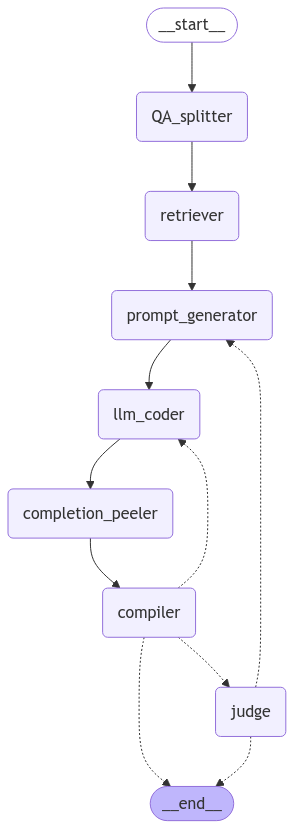

In [16]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

from dsl_gen.core.flows import build_rag_flow

flow = build_rag_flow()
display(
    Image(
        flow.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [15]:
print(flow.get_graph().draw_mermaid())

%%{init: {'flowchart': {'curve': 'linear'}}}%%
graph TD;
	__start__([<p>__start__</p>]):::first
	QA_splitter(QA_splitter)
	retriever(retriever)
	prompt_generator(prompt_generator)
	llm_coder(llm_coder)
	completion_peeler(completion_peeler)
	compiler(compiler)
	judge(judge)
	__end__([<p>__end__</p>]):::last
	QA_splitter --> retriever;
	__start__ --> QA_splitter;
	completion_peeler --> compiler;
	llm_coder --> completion_peeler;
	prompt_generator --> llm_coder;
	retriever --> prompt_generator;
	compiler -.-> llm_coder;
	compiler -.-> judge;
	compiler -.-> __end__;
	judge -.-> prompt_generator;
	judge -.-> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



---

## Invoke workflow

In [17]:
from dsl_gen import CFG
from pathlib import Path
from dsl_gen.core.flows import build_rag_flow
import logging
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
# Reset the active model to openai to boost inference speed
CFG.MODEL_CFG.active_model = "openai"

challenge_path = Path(CFG.PATH_CFG.CHALLENGES_PATH) / "c001.json" 

flow = build_rag_flow()

# It is normal that you see 'INFO - Failed to load GPU Faiss'
# since we are using CPU
result = flow.invoke({"challenge_path": str(challenge_path)}) 

print(result["completion"]) 

2025-02-04 01:08:35,859 - dsl_gen - INFO - Retrieved 20 docs for query: Create a table named
2025-02-04 01:08:36,207 - dsl_gen - INFO - Model loaded: gpt-3.5-turbo, base_url: https://api.openai.com/v1
2025-02-04 01:08:37,404 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


# Question

Create a table named `T` that contains 3 lines. There must be column named `X` that contains the values `a`, `b` and `c`. Put this table on display.

# Coder's Completion

```envision
table T = with
  [| as X |]
  [| "a"  |]
  [| "b"  |]
  [| "c"  |]

show table "T" a1a3 with T.X
```  

2025-02-04 01:08:37,733 - dsl_gen - INFO - Code compiled successfully (Attempt 1)
2025-02-04 01:08:38,860 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-02-04 01:08:38,867 - dsl_gen - INFO - Judgment: Step 1: Check if the table `T` is created with the correct structure:
- The table `T` is correctly created with a column named `X` and values `a`, `b`, and `c`.

Step 2: Check if the table `T` is displayed properly:
- The `show table` command displays the table `T` with column `X` as expected.

Considering the above steps, the solution provided is correct and compliant with the requirements.

### Final Judgment: 1 (Correct)
2025-02-04 01:08:38,868 - dsl_gen - INFO - Judgment: correct
2025-02-04 01:08:38,869 - dsl_gen - INFO - Answer passed quality check


table T = with
  [| as X |]
  [| "a"  |]
  [| "b"  |]
  [| "c"  |]

show table "T" a1a3 with T.X


---

# Appendix: VectorStore

Below is a detailed explanation of VectorStore content display and similarity search filters:

---

## How to View Chunk Content in VectorStore

### Method 1: Directly Accessing the Underlying Storage (Using FAISS as an Example)

```python
# Assuming an initialized vectorstore object

from langchain_community.vectorstores import FAISS

def show_all_chunks(vectorstore: FAISS) -> list:
    """Displays all stored chunks and their metadata"""
    chunks = []
    # Iterate through all document IDs
    for doc_id in vectorstore.index_to_docstore_id.values():
        document = vectorstore.docstore.search(doc_id)
        chunks.append({
            "id": doc_id,
            "content": document.page_content,
            "metadata": document.metadata
        })
    return chunks

# Example usage
for chunk in show_all_chunks(vectorstore):
    print(f"[ID: {chunk['id']}]")
    print(f"Metadata: {chunk['metadata']}")
    print(f"Content: {chunk['content'][:50]}...\n")

# Sample Output:
# [ID: 89a3b2f1]
# Metadata: {'source': 'manual.pdf', 'page': 23}
# Content: Envision language supports time series analysis using window functions...
```

### Method 2: Retrieve All Chunks via Search (Temporary Approach)
```python
# Retrieve all documents by searching an empty string (Use with caution)
all_docs = vectorstore.similarity_search(query="", k=1000)  # Set k to a sufficiently large number
for i, doc in enumerate(all_docs):
    print(f"Chunk {i+1}: {doc.page_content[:80]}...")
```

---

## **Understanding the `similarity_search` Filter Parameter**

### Purpose
- **Metadata Filtering**: Restrict searches to documents that meet specific criteria.
- **Performance Optimization**: Reduce the number of candidate documents that need to be compared.
- **Business Adaptability**: Dynamically adjust the search scope based on use cases.

### Filtering Syntax Examples
```python
# Basic filtering (Equality)
vectorstore.similarity_search(
    "Time Series Forecasting",
    filter={"source": "finance_docs"},  # Search only financial documents
    k=3
)

# Comparison Operators
vectorstore.similarity_search(
    "Data Cleaning",
    filter={
        "page": {"$gte": 50},          # Page number >= 50
        "version": {"$ne": "draft"}    # Exclude draft versions
    }
)

# Multiple Conditions
vectorstore.similarity_search(
    "Machine Learning",
    filter={
        "$and": [
            {"category": "AI"},
            {"security_level": {"$lte": 2}}
        ]
    }
)

# Array Containment
vectorstore.similarity_search(
    "Distributed Computing", 
    filter={
        "tags": {"$in": ["spark", "hadoop"]}  # Includes any specified tags
    }
)
```

### Supported Operators
| Operator | Description             | Example                          |
|----------|-------------------------|----------------------------------|
| `$eq`    | Equals (default)         | `{"author": "John"}`            |
| `$ne`    | Not equals               | `{"status": {"$ne": "draft"}}`  |
| `$gt`    | Greater than             | `{"views": {"$gt": 1000}}`      |
| `$gte`   | Greater than or equal to | `{"year": {"$gte": 2020}}`      |
| `$lt`    | Less than                | `{"priority": {"$lt": 5}}`      |
| `$lte`   | Less than or equal to    | `{"rating": {"$lte": 4.5}}`     |
| `$in`    | Contained in array       | `{"tags": {"$in": ["AI"]}}`     |
| `$nin`   | Not contained in array   | `{"lang": {"$nin": ["zh"]}}`    |
| `$and`   | Logical AND              | See combined example above      |
| `$or`    | Logical OR               | `{"$or": [cond1, cond2]}`       |

---

## **Best Practices and Practical Advice**

### 1. **Metadata Design Tips**
- Inject structured metadata when splitting documents.
```python
from langchain.docstore.document import Document

Document(
    page_content=chunk_text,
    metadata={
        "source": "user_manual_v3.pdf",
        "section": "API Reference",
        "last_updated": "2024-03-15"
    }
)
```

### 2. **Efficient Filtering Strategies**
```python
# Predefined common filters
FILTERS = {
    "technical_docs": {"doc_type": "technical"},
    "recent_updates": {"last_updated": {"$gte": "2024-01-01"}},
    "high_priority": {"priority": {"$gte": 8}}
}

# Dynamically build filters
def build_filter(include_filters: list[str]):
    return {"$and": [FILTERS[f] for f in include_filters]}
```

### 3. **Debugging and Metadata Analysis**
```python
# Display metadata field distributions
from collections import defaultdict

def analyze_metadata(vectorstore):
    field_stats = defaultdict(set)
    for doc_id in vectorstore.index_to_docstore_id.values():
        doc = vectorstore.docstore.search(doc_id)
        for k, v in doc.metadata.items():
            field_stats[k].add(str(v))  # Convert to string to avoid type issues
  
    for field, values in field_stats.items():
        print(f"Field '{field}':")
        print(f"  Unique values ({len(values)}): {', '.join(list(values)[:3])}...")

# Sample Output:
# Field 'source': 
#   Unique values (4): manual_v2.pdf, blog_post.md, api_spec.json...
```

By effectively utilizing metadata filtering and content inspection methods, you can significantly enhance the **controllability** and **interpretability** of a Retrieval-Augmented Generation (RAG) system.